# **The Spark Foundation**

# *Name- Torsha Mondal* 

# **Task 3: Exploratory Data Analysis - Retail**



*  To Perform 'Exploratory Data Analysis' on dataset "SampleSuperstore"
*  To detect the weak areas where more work is necessary to make profit.


*   Analysising more Business Problems.






In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data
df = pd.read_csv('SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# Preprocessing Part- I

In [ ]:
#Check the shape
df.shape

(9994, 13)

In [ ]:
#check for the missing value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# 1. What are the  weak areas where we need to work to make more profit?

To answer this question let's make a plot on the Profit/Loss across all the states of USA.

Changing the State Column as State Code

In [ ]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [ ]:
#import few more libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Plotting in Geo-Spatial Graph for better Visualization

In [ ]:

state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

fig.show()

The observations from the above graph are-



*   The states like **California, New York and Washington** makes the highest profit of around 30k signified by the green colour.

*   The blue and sky blue color signifies the states with average profit of around 25K and mainly in the north-east and south-east regrion.


*   The state of **Texas**,  proved to be the most expensive state for the company with a **very high loss** of around 25K.





Thus, the most weaker areas are **Texas, Pennslyvania and Ohio**.

# **Processing Part- II**

# Checking for Duplicates

In [ ]:
#Checking for duplicates
df.duplicated().sum()

17

In [ ]:
#removing duplicates
df = pd.DataFrame.drop_duplicates(df)
df.duplicated().sum()

# Checking for Outliers 

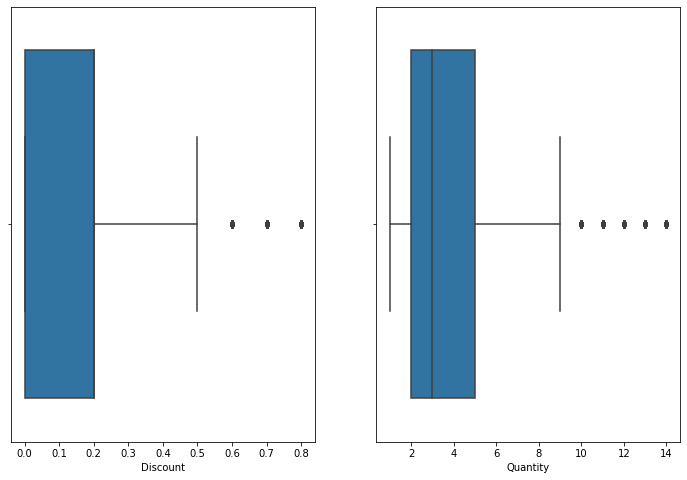

In [ ]:
fig, ax= plt.subplots(1, 2, figsize=(12,8))
#sns.boxplot(x=df["Sales"], ax=ax[0])
sns.boxplot(x=df["Discount"], ax=ax[0])
sns.boxplot(x=df["Quantity"], ax=ax[1])

Note- The best way to **check for outliers are Boxplot**, and while plotting so one thing have to be kept in mind that not all Numerical data will have outliers. 
e.g- in this case **Sales and Profit** column don't have outliers rather they have a wide range of data. 
But on the other hand **Quantity and Discount** have outliers as seen from the above plot. 

# Removing the Outliers- 
by Percentile Technique

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
#new shape
df_new.shape

(7127, 14)

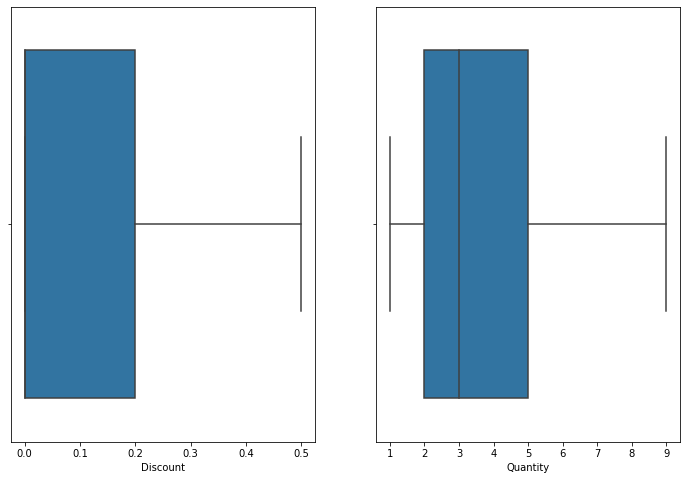

In [ ]:
#After removing the Outliers
fig, ax= plt.subplots(1, 2, figsize=(12,8))
sns.boxplot(x=df_new["Discount"], ax=ax[0])
sns.boxplot(x=df_new["Quantity"], ax=ax[1])
#sns.boxplot(x=df_new["Quantity"], ax=ax[2])

In [ ]:
# drop the unnecessary columns
df_new.drop(['Postal Code'], axis=1)


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136,KY
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,CA
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,FL
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694,CA
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.6470,GA
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028,FL
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332,CA
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932,CA


# **Plotting the Geo-Spatial Graph with the new data for Sales and for Profit**

In [ ]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df_new['state_code'] = df_new.State.apply(lambda x: state_code[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# for State-Wise Sales
state_data = df_new[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'blues',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

The Observations from the above graph are:



*   The company has the highest sales in the state of California (shown in dark blue), selling around 130K of goods.

*   New York (bright blue, top right) is the state with the second highest sales, with more that 60k worth of goods sold.


*   The states of Texas (bottom most, blue) and Washington (top left, blue) end up third and fourth on the top sales charts with around $48K and 34K in sales respectively.
*   If we look at the overall data, we will observe that the supermarket company does most of its business in East Coast and West Coast region. In fact, the total sales in the state of New York is more than the sales in all of the Central America combined.






In [ ]:
# for State-Wise Profit/Loss
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
  
    colorscale= 'reds',
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))


fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

fig.show()


The observations from the above plot are:


*   The deep manroon marks the highest Profit i.e. California followed by New York and Washington DC but this time the value of Profit has changed for the new data.
*   Even though removing the duplicates and outliers doen't have any as such effect on Sales and Profit data apart of change in values. 


*   But it has an adverse effect on the Loss count i.e. from the above graph only we can see that Texas, Ohio etc. are not the loss sharing state anymore.
*   This new synthezied data is a littlebit misleading in terms of Truthfulness and Beauty but it was mandatory to remove the duplicate data and outliers.

Thus, one has to be very careful while Pre-Processing the data.
Since, this is my first project on Exploratory Data Analysis so I will say later what modify can be done to rectify this problem.





# More on Business Analytics

To get to know more insight on the Sales and Profit/Loss on Category and Region-
We plot them in the barchart.

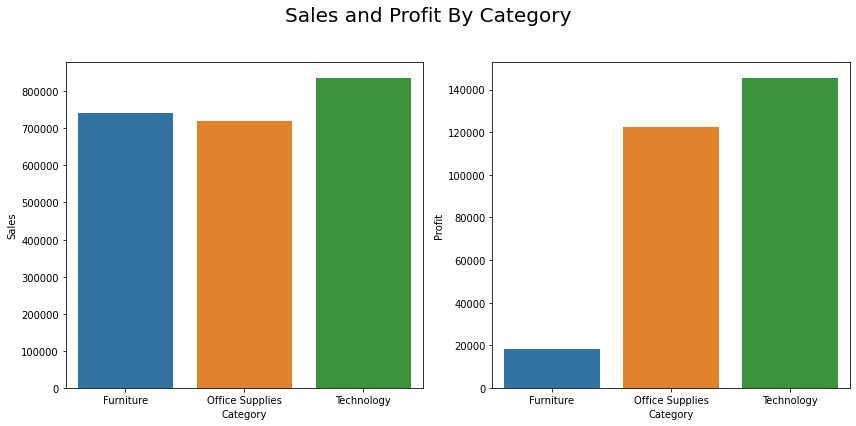

In [ ]:
#plotting the sales and profit by Category
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Sales and Profit By Category", fontsize=20)

df_by_category = df.groupby("Category")[["Sales", "Profit", "Region"]].sum()

sns.barplot(x=df_by_category.index, y=df_by_category["Sales" ], ax=ax[0])
sns.barplot(x=df_by_category.index, y=df_by_category["Profit"], ax=ax[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

From, the above plot it is observed that while having a reasonable Sales margin the Furniture is gaining a minimun  profit.

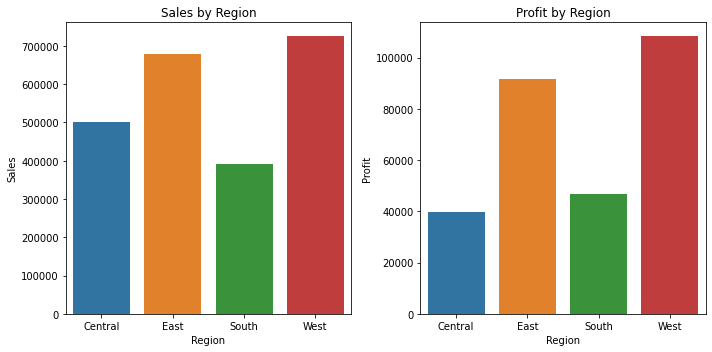

In [ ]:
#plotting the Sales and Profit by Region
df_groupby_region = df.groupby("Region", sort=True)[["Sales", "Profit"]].sum()

fig, ax = plt.subplots(1 ,2, figsize=(10,5))

ax[0].set_title("Sales by Region")
sns.barplot(x=df_groupby_region.index, y=df_groupby_region["Sales"], ax=ax[0])

ax[1].set_title("Profit by Region")
sns.barplot(x=df_groupby_region.index, y=df_groupby_region["Profit"], ax=ax[1])

plt.tight_layout()

The Western region shows maximum Sales and Profit and the South shows the minimun profit while the Central showing the Lowest Profit among all. 

Counting the distribution of Products Catogorically over different Region-

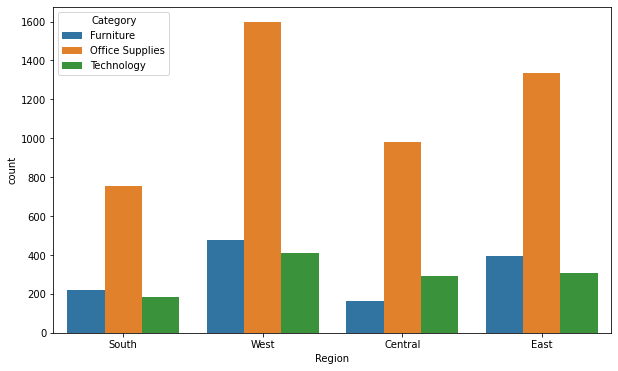

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Region", hue="Category", data=df_new)

Among all the Regions the Office Supplies Product shows the Maximum Count.

# **Visualizing Profit/Loss over all the Products Subcategorically-**

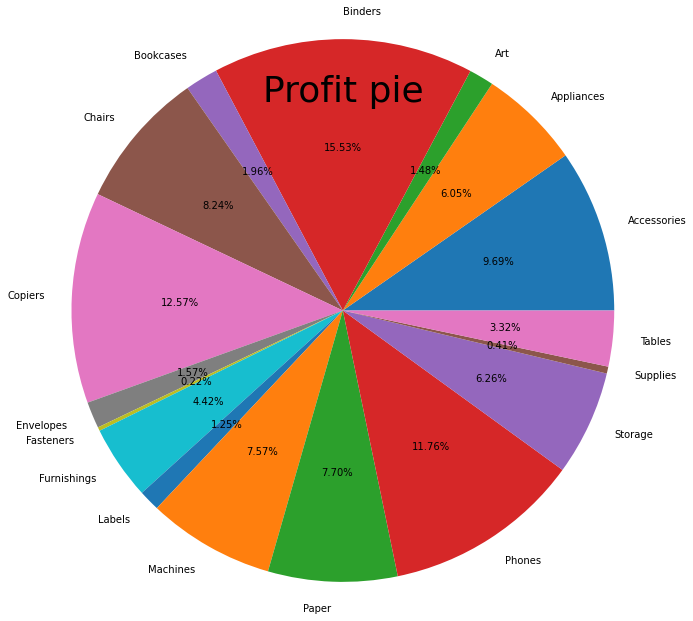

In [ ]:
profit=df[df.Profit>0]
loss=df[df.Profit<0]

# percentage share of total profit by each sub-category
plt.pie(profit.groupby('Sub-Category').agg('sum').Profit,radius=3.12,labels=profit.groupby('Sub-Category').agg('sum').index,
       autopct='%1.2f%%')
plt.title('Profit pie',fontdict=dict(fontsize=36),pad=100,loc='center')
plt.show()





From the above Pie-Chart it is observed that the **Binder** shows the highest Profit followed by **Phone** and **Copiers**.

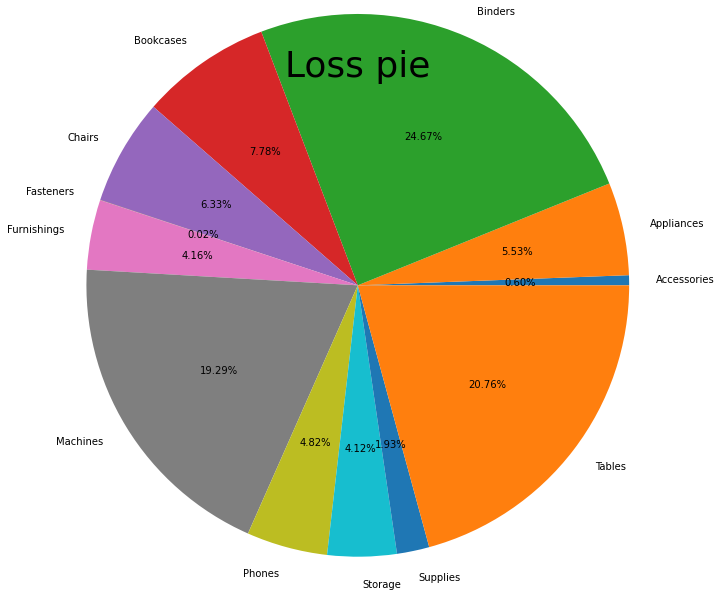

In [ ]:
plt.pie(np.abs(loss.groupby('Sub-Category').agg('sum').Profit),radius=3.12,labels=loss.groupby('Sub-Category').agg('sum').index,
       autopct='%1.2f%%')
plt.title('Loss pie',fontdict=dict(fontsize=36),pad=100,loc='center')
plt.show()

From the Loss-Pie it is observed that **Binder, Tables and Machines** shows remarkable loss. 
The **Copier, Paper and Labels** shows **no loss**. This might be since they are Office Accessories.

# **Sales and Profit insight for each Shipping Category-**

In [ ]:
df['Profit1'] = df.Profit.apply(lambda x: x if (x > 0) else 0)
fig = px.bar(df,x = 'Ship Mode', y = 'Profit1', title = 'Profit in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['Profit', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Profit'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

In [ ]:
df['loss'] = df.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar(df,x = 'Ship Mode', y = "loss", title = 'Losses in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

In [ ]:
fig = px.bar(df,x = 'Ship Mode', y = "Sales", title = 'Sales in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['Sales', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Sales'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

In every aspect Standard Class shows the Highest Variation.

Conclusion- This is a very simple Exploratory Data Analysis I performed. Many more aspects can be obtained from more detailed Analysis.